In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Cleaning and Handling Missing Values

In [151]:
df = pd.read_csv("./AB_NYC_2019.csv")

df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [152]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [157]:
# Convert to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [161]:
df[df['reviews_per_month'].isna()].head(999999)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaT,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaT,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaT,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaT,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2


In [163]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [165]:
df['name'] = df['name'].fillna('unknown')

In [167]:
df['host_name'] = df['host_name'].fillna('unknown')

In [169]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Summary Statistics for Numerical Columns

In [172]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-04 01:47:23.910099456,1.090910,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-08 00:00:00,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-19 00:00:00,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-23 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.597283,32.952519,131.622289


In [174]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Distribution of Categorical Columns

C:\Users\suriy\AppData\Local\Temp\ipykernel_384\1043674172.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette='viridis')


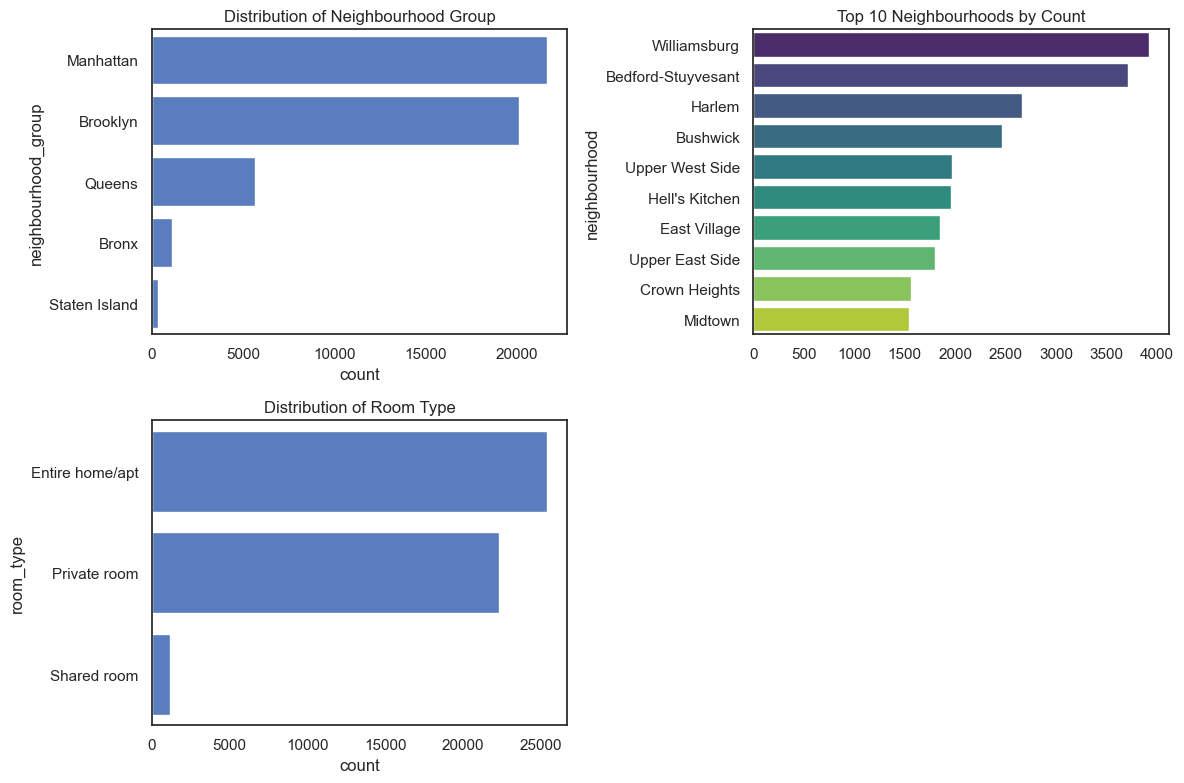

In [177]:
# Set up the figure size and style
plt.figure(figsize=(12, 8))

# Distribution of `neighbourhood_group`
plt.subplot(2, 2, 1)
sns.countplot(y='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribution of Neighbourhood Group')

# Distribution of `neighbourhood` (Top 10 neighborhoods)
plt.subplot(2, 2, 2)
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(10)
sns.barplot(y=top_neighbourhoods.index, x=top_neighbourhoods.values, palette='viridis')
plt.title('Top 10 Neighbourhoods by Count')

# Distribution of `room_type`
plt.subplot(2, 2, 3)
sns.countplot(y='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Type')

# Display the plots
plt.tight_layout()
plt.show()


Average Prices and Availability by Neighbourhood Group:
                           price  availability_365
neighbourhood_group                              
Bronx                 87.496792        165.758937
Brooklyn             124.383207        100.232292
Manhattan            196.875814        111.979410
Queens                99.517649        144.451818
Staten Island        114.812332        199.678284

Average Prices and Availability by Room Type:
                       price  availability_365
room_type                                    
Entire home/apt  211.794246        111.920304
Private room      89.780973        111.203933
Shared room       70.127586        162.000862


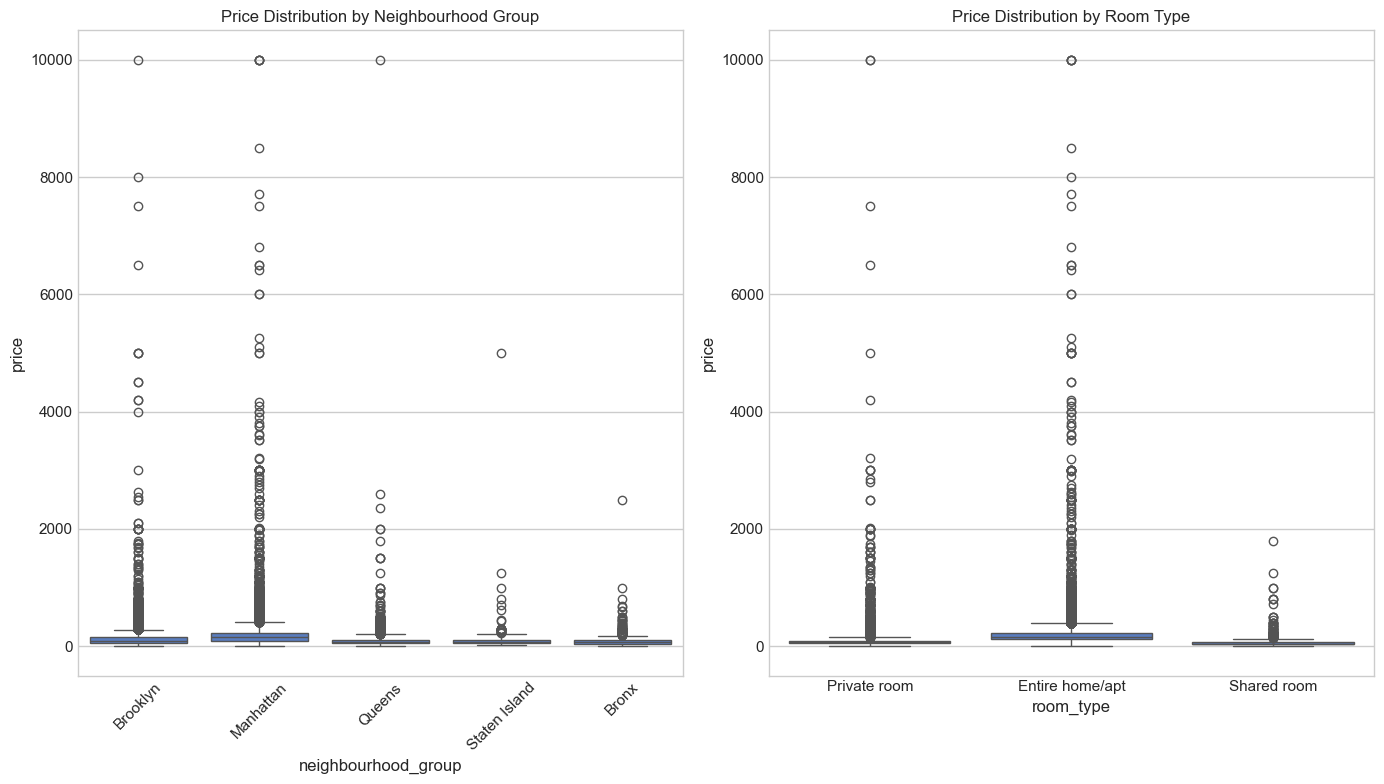

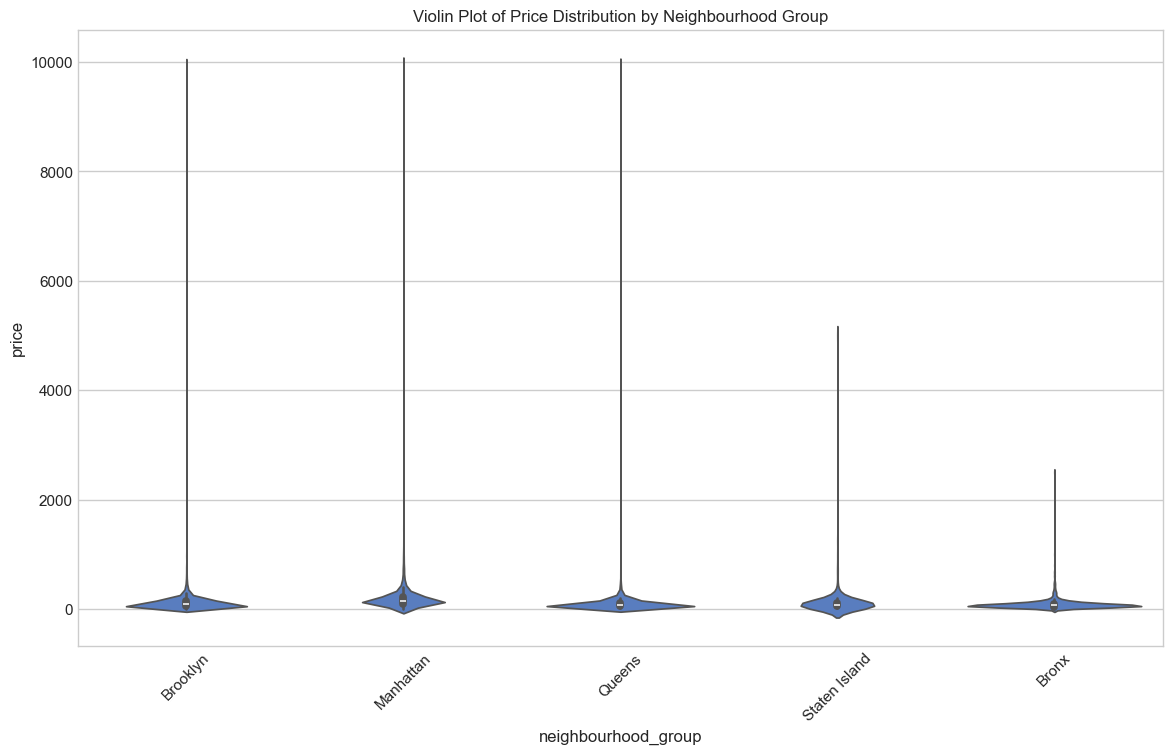

In [178]:
# Set plot style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 8))

# Group by `neighbourhood_group` and calculate average price and availability
neighbourhood_group_stats = df.groupby('neighbourhood_group')[['price', 'availability_365']].mean()
print("Average Prices and Availability by Neighbourhood Group:\n", neighbourhood_group_stats)

# Group by `room_type` and calculate average price and availability
room_type_stats = df.groupby('room_type')[['price', 'availability_365']].mean()
print("\nAverage Prices and Availability by Room Type:\n", room_type_stats)

# Boxplot: Price vs. Neighbourhood Group
plt.subplot(1, 2, 1)
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xticks(rotation=45)

# Boxplot: Price vs. Room Type
plt.subplot(1, 2, 2)
sns.boxplot(x='room_type', y='price', data=df)
plt.title('Price Distribution by Room Type')

# Show plots
plt.tight_layout()
plt.show()

# Violin Plot: Price vs. Neighbourhood Group
plt.figure(figsize=(14, 8))
sns.violinplot(x='neighbourhood_group', y='price', data=df)
plt.title('Violin Plot of Price Distribution by Neighbourhood Group')
plt.xticks(rotation=45)
plt.show()


In [179]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Data Visualization

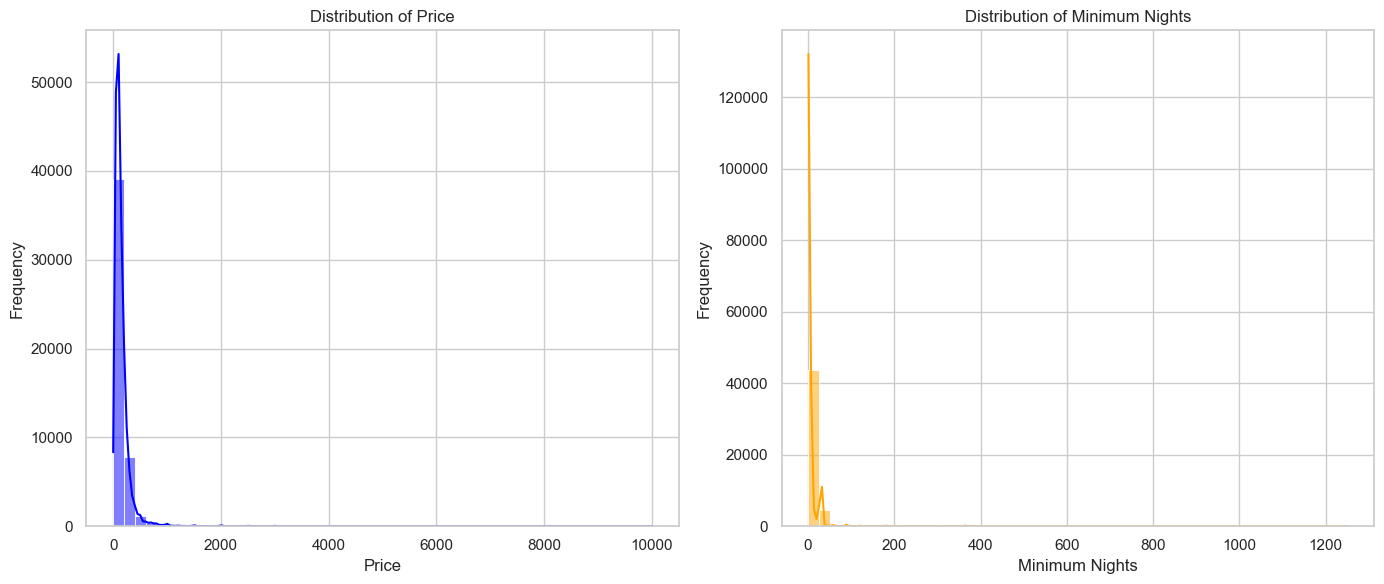

C:\Users\suriy\AppData\Local\Temp\ipykernel_384\2707450328.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='room_type', data=df, palette='viridis')
C:\Users\suriy\AppData\Local\Temp\ipykernel_384\2707450328.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='neighbourhood_group', data=df, palette='viridis')


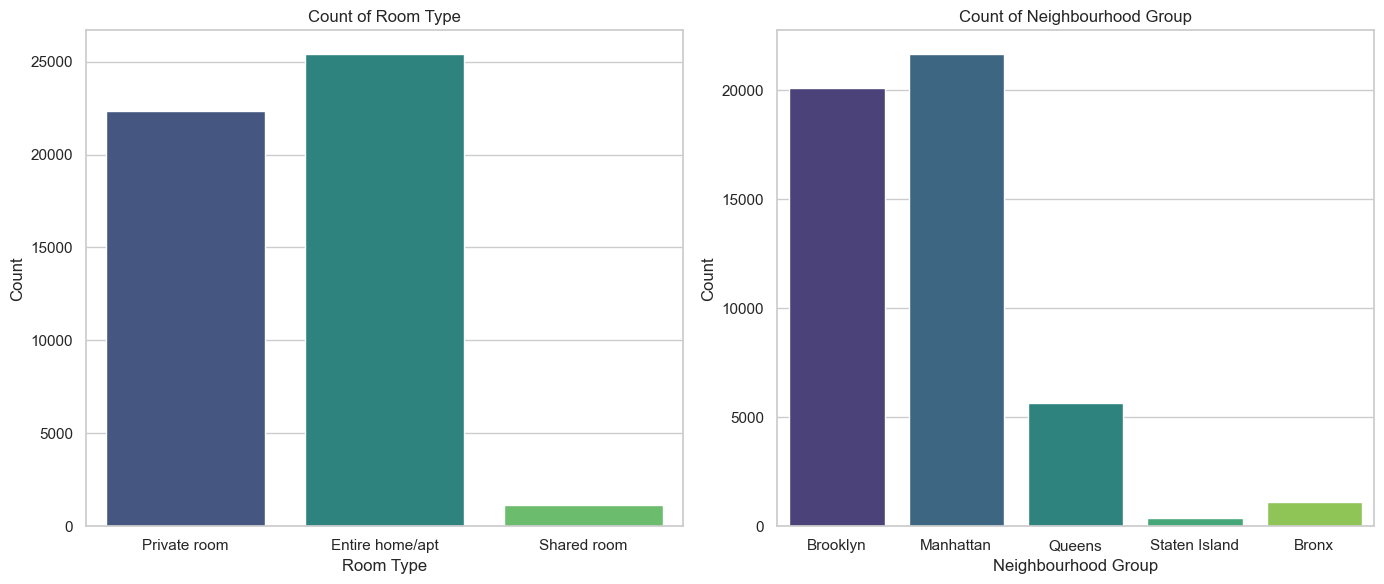

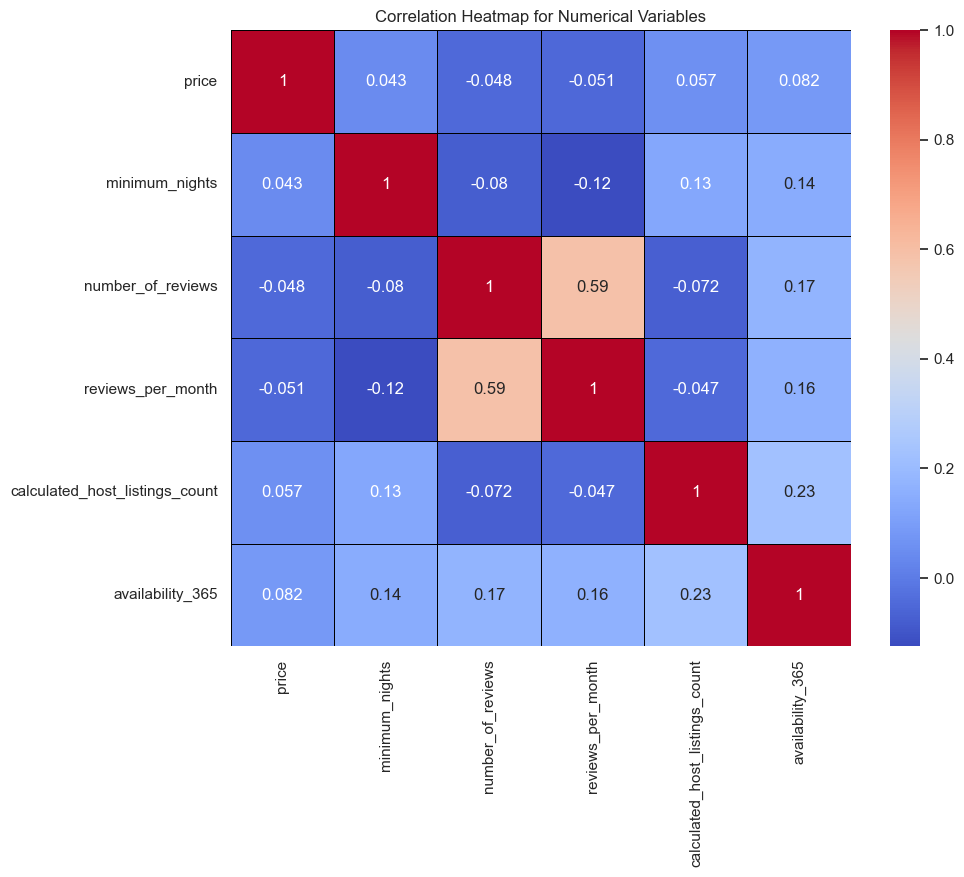

In [181]:
# Set plot style
sns.set(style="whitegrid", palette="muted")

# 1. Visualizing the Distribution of `price` and `minimum_nights`
plt.figure(figsize=(14, 6))

# Histogram for `price`
plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Histogram for `minimum_nights`
plt.subplot(1, 2, 2)
sns.histplot(df['minimum_nights'], bins=50, kde=True, color='orange')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Bar Charts / Count Plots for Categorical Variables
plt.figure(figsize=(14, 6))

# Count Plot for `room_type`
plt.subplot(1, 2, 1)
sns.countplot(x='room_type', data=df, palette='viridis')
plt.title('Count of Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Count Plot for `neighbourhood_group`
plt.subplot(1, 2, 2)
sns.countplot(x='neighbourhood_group', data=df, palette='viridis')
plt.title('Count of Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(10, 8))

# Calculate correlation matrix for numerical variables
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()

# Generate heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


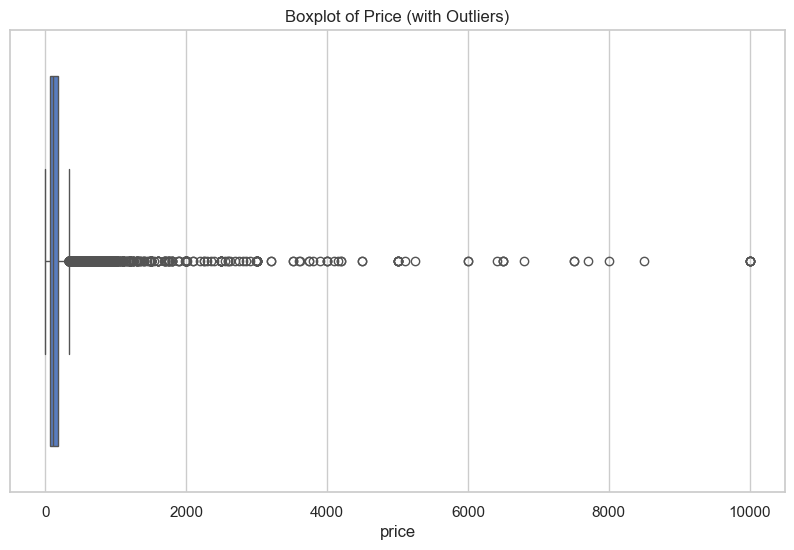

Number of outliers in price: 2972
Percentage of outliers in price: 6.08%


In [182]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Display the count of outliers and percentage
outlier_count = len(outliers)
total_count = len(df)
outlier_percentage = (outlier_count / total_count) * 100

# Plot boxplot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (with Outliers)')
plt.show()

print(f"Number of outliers in price: {outlier_count}")
print(f"Percentage of outliers in price: {outlier_percentage:.2f}%")


## Geographical Visualizations

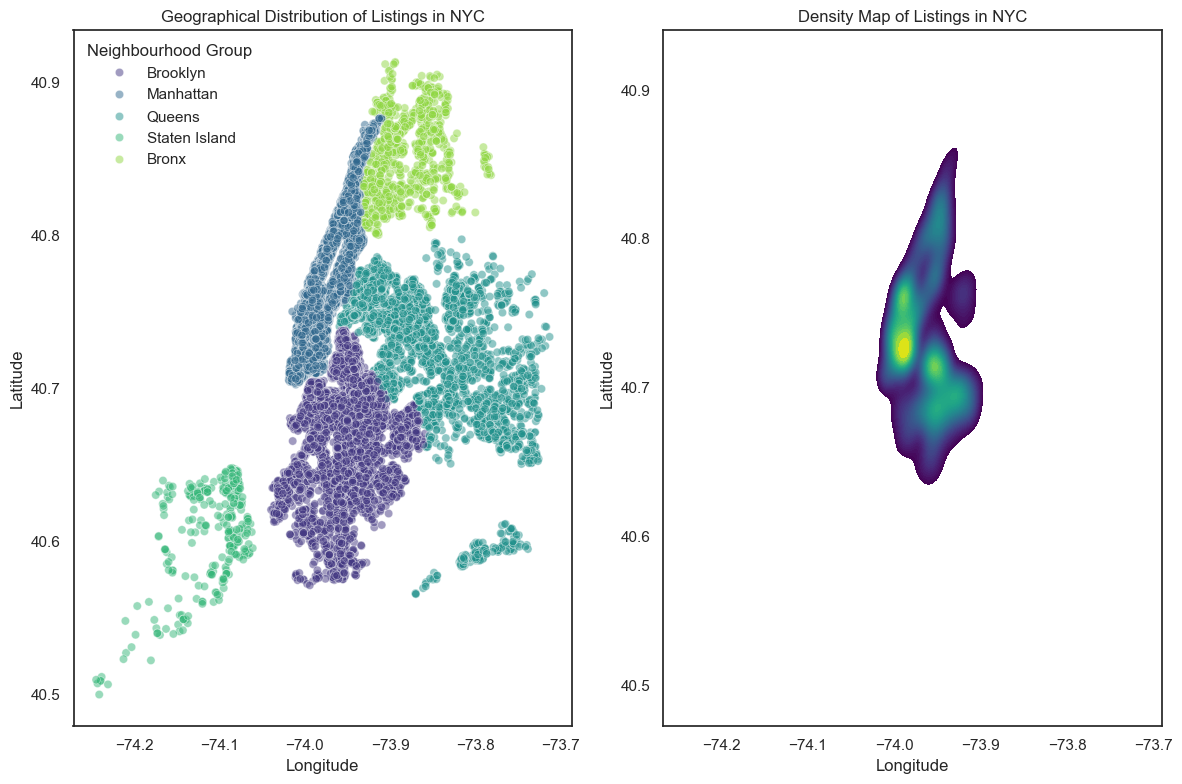

In [185]:
# Set up figure size and style
plt.figure(figsize=(12, 8))
sns.set(style='white', palette='muted')

# 1. Scatter Map: Latitude and Longitude
plt.subplot(1, 2, 1)
sns.scatterplot(x='longitude', y='latitude', data=df, hue='neighbourhood_group', palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group', loc='upper left')

# 2. Density Map: Latitude and Longitude
plt.subplot(1, 2, 2)
sns.kdeplot(x=df['longitude'], y=df['latitude'], fill=True, cmap='viridis', thresh=0.2, levels=50)
plt.title('Density Map of Listings in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plots
plt.tight_layout()
plt.show()


## Outlier Detection

Outliers in price:
             id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                perfect for a family or small group      74303   
103       23686  2000 SF 3br 2bath West Village private  townhouse      93790   
114       26933  2 BR / 2 Bath Duplex Apt with patio! East Village      72062   
121       27659                   3 Story Town House in Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 stops from Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt in the Best Location of FiDi   29741813   
48839  36452721  Massage Spa. Stay overnight. Authors Artist dr...  274079964   
48842  36453160  LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...  224171371   
48856  36457700  Large 3 bed, 2 bath , garden , bbq , all you need   66993395   

        

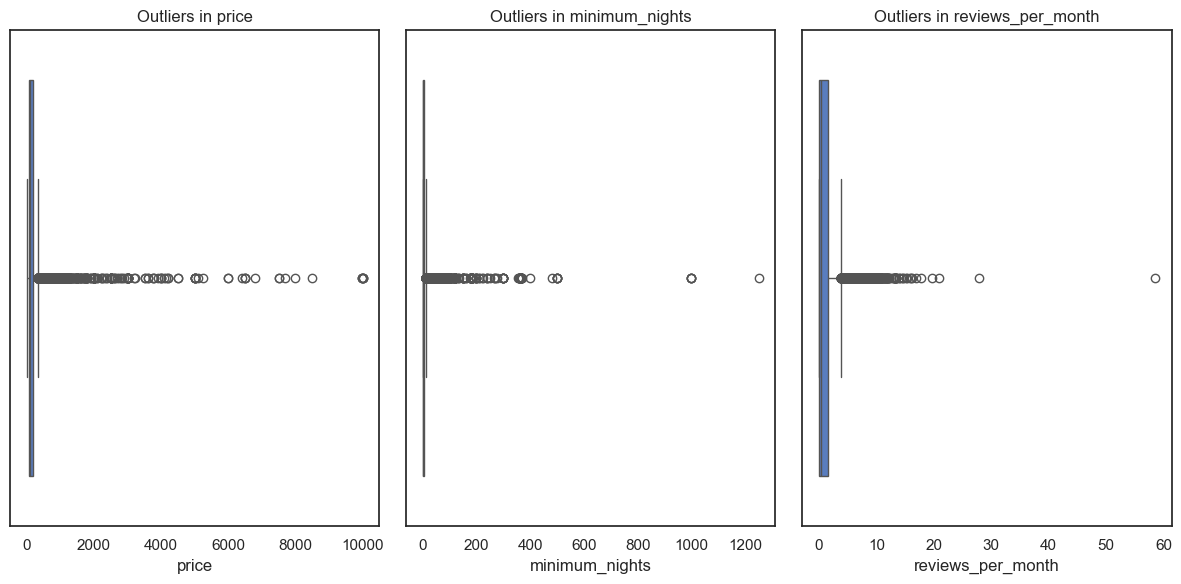

In [192]:
import numpy as np


# Identify numerical columns for outlier detection
numerical_columns = ['price', 'minimum_nights', 'reviews_per_month']

# Outlier detection using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers for each numerical column
for column in numerical_columns:
    outliers = detect_outliers(df, column)
    print(f"Outliers in {column}:")
    print(outliers)

# Visualize outliers using boxplot
plt.figure(figsize=(12, 6))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df[column])
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


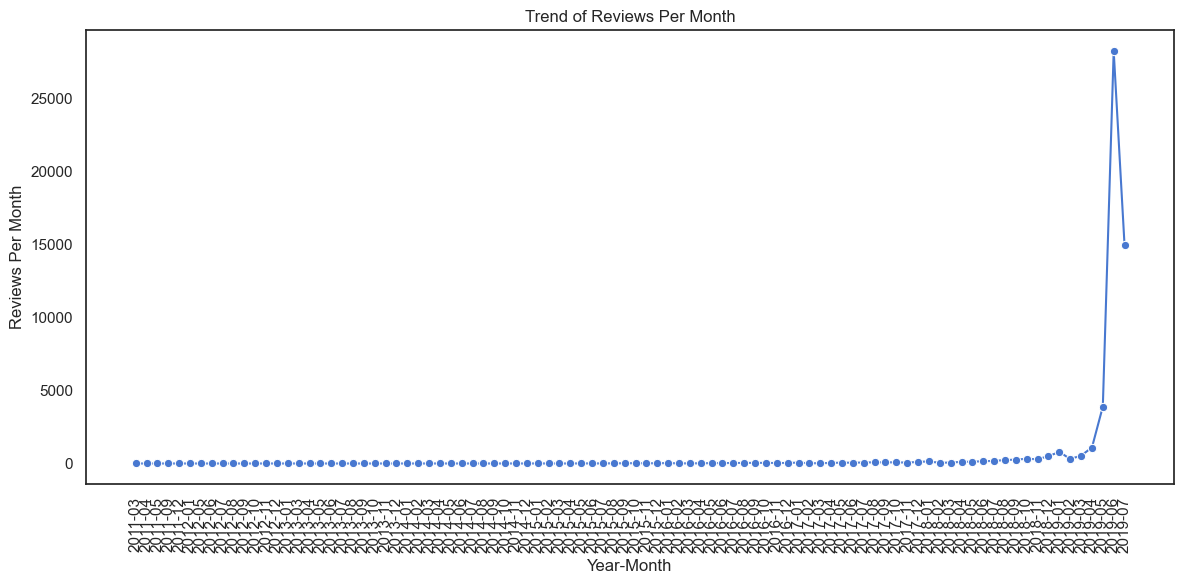

In [198]:
# Convert last_review to datetime if it's not already
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Group by month and year, then analyze the trend of reviews per month
df['year_month'] = df['last_review'].dt.to_period('M')

# Make sure reviews_per_month is numeric
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce')

# Drop any rows with missing values in 'year_month' or 'reviews_per_month'
monthly_reviews = df.dropna(subset=['year_month', 'reviews_per_month'])

# Aggregate the total reviews per month
monthly_reviews = monthly_reviews.groupby('year_month')['reviews_per_month'].sum().reset_index()

# Convert year_month to string for easier plotting
monthly_reviews['year_month'] = monthly_reviews['year_month'].astype(str)

# Plot the trend of reviews per month
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='reviews_per_month', data=monthly_reviews, marker='o')
plt.xticks(rotation=90)
plt.title('Trend of Reviews Per Month')
plt.xlabel('Year-Month')
plt.ylabel('Reviews Per Month')
plt.tight_layout()
plt.show()
